1. Resolveremos el siguiente sistema se ecuaciones lineales por el método de Gauss-Jordan
$$
\begin{aligned}
2 x^1+4 x^2+3 x^3 & =4 \\
x^1-2 x^2-2 x^3 & =0 \\
-3 x^1+3 x^2+2 x^3 & =-7
\end{aligned}
$$

In [1]:
import sympy
from sympy import *
init_printing()

Introducimos el sistema de ecuaciones:

In [2]:
# Definimos las variables simbólicas
x1, x2, x3 = symbols('x1 x2 x3')
ec1=Eq(2*x1+4*x2+3*x3,4)
ec2=Eq(x1-2*x2-2*x3,0)
ec3=Eq(-3*x1+3*x2+2*x3,-7)
ec1,ec2,ec3

Construimos la matriz de coeficientes y la denominaremos $A$ 

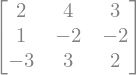

In [3]:
A = Matrix([[2, 4, 3], [1, -2, -2], [-3, 3, 2]])
A

Le agregamos la columna con los elementos independientes

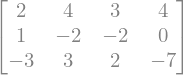

In [4]:
M = A.col_insert(3, Matrix([4, 0, -7]))
M

Calculamos la forma escalonada de la matriz

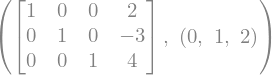

In [5]:
M.rref()

De la última fila es fácil determinar que ${x^3}=4$. Los otros dos valores que resultan son ${x^2}=-3$ y  ${x^1}=2$. 

Por supuesto podemos recurrir al cálculo directo:

In [6]:
sol = linsolve([ec1,ec2,ec3], (x1, x2, x3))
sol


2.  Resolvamos nuevamente el mismo sistema pero ahora por el método de la matriz inversa.

La matriz inversa de $A$ la denominaremos $Ainv$, y la calcularemos de la manera siguiente

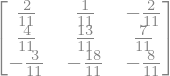

In [7]:
Ainv =A.inv()
Ainv

La matriz con los términos inhomogéneos lo llamaremos $C$:

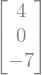

In [8]:
C = Matrix([4, 0,-7])
C

Para que finalmente podamos hacer la siguiente multiplicación de matrices:

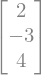

In [9]:
Ainv*C

Por lo tanto: ${x^1}=2$, ${x^2}=-3$, ${x^3}=4$.

3. Vamos ahora a resolver el mismo sistema pero usando la técnica de factorización $ \mathbb{L} \mathbb{U}$. 

Le podemos pedir al programa que factorize la matriz $A$, consultar el manual de **SymPy** para más detalles.

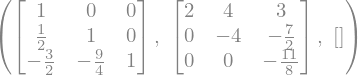

In [10]:
A.LUdecomposition()

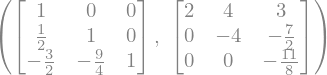

In [11]:
L, U, _ = A.LUdecomposition()
L,U

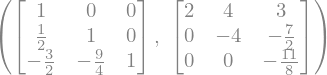

In [12]:
L,U

Podemos resolver entonces la primera parte, $\mathbb{L} \mathbb{Y}= \mathbb{C}\Rightarrow \mathbb{Y}=\mathbb{L}^{-1}\mathbb{C}  $: 

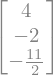

In [13]:
Y =L.inv()*C
Y

Y ahora $ \mathbb{U} \mathbb{X}= \mathbb{Y}$:

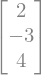

In [14]:
X =U.inv()*Y
X

Por lo que resulta que: ${x^1}=2$,  ${x^2}=-3$,  ${x^3}=4$.

Notemos que:

In [15]:
A.det() == L.det()*U.det() 

True

4. Utilicemos ahora los determinantes de Cramer. Para tal fin, construiremos las matrices eliminando las columnas correspondientes.

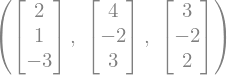

In [16]:
# Extraemos las columnas de la matriz A
A1 = A.col(0)
A2 = A.col(1)
A3 = A.col(2)
A1,A2,A3

Construimos  las nuevas matrices con las matrices columnas anteriores

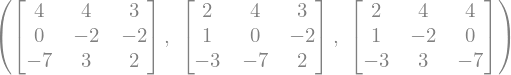

In [17]:
D1 = Matrix.hstack(C, A2, A3)
D2 = Matrix.hstack(A1, C, A3)
D3 = Matrix.hstack(A1, A2, C)
D1,D2,D3

In [18]:
# Calculamos los determinantes
x1 = D1.det() / A.det()
x2 = D2.det() / A.det()
x3 = D3.det() / A.det()
x1, x2, x3

SymPy puede resolver  el sistema $ \mathbb{A} \mathbb{x} = \mathbb{C}$ usando directamente la eliminación de Gauss Jordan.

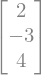

In [19]:
sol, param = A.gauss_jordan_solve(C)
sol

Si el sistema está subdeterminado (por ejemplo, $\mathbb{A}$ tiene más columnas que filas), son posibles infinitas soluciones, en términos de parámetros arbitrarios. Estos parámetros arbitrarios se devuelven como matriz de parámetros.

5.  Existen entonces algunas consideraciones a tomar en cuenta. 

- El sistema puede contener más incógnitas que ecuaciones, por ejemplo:

In [20]:
x, y, z = symbols('x y z')
ecu1= Eq(x+y+z,1) 
ecu2= Eq(x+2*y+z,0)
ec1,ecu2

In [21]:
sol = linsolve([ecu1,ecu2], (x, y, z))
sol

El programa nos está señalando que las soluciones, en este caso infinitas.  Una solución puede ser entonces la siguiente: $\{x=2 , y=-1 , z=0\}$.

Podemos también hacer lo siguiente:

In [22]:
# La matriz de coeficientes
A = Matrix([[1, 1, 1], [1, 2, 1]])
# La matriz de los coeficientes inhomogéneos
C = Matrix([1, 0])

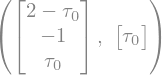

In [23]:
sol, param = A.gauss_jordan_solve(C)
sol,param

- El sistema tiene más ecuaciones que incógnitas, por ejemplo:

In [24]:
ecu1= Eq(x+y,5) 
ecu2= Eq(x+2*y,8)
ecu3= Eq(3*x+y,9)
ecu1,ecu2,ecu3

In [25]:
sol = linsolve([ecu1,ecu2,ecu3], (x, y))
sol

Aquí, SymPy encuentra una solución al eliminar una de las ecuaciones dependientes. 

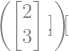

In [26]:
# La matriz de coeficientes
A = Matrix([[1, 1], [1, 2],[3,1]])
# La matriz de los coeficientes inhomogéneos
C = Matrix([5, 8,9])
sol, param = A.gauss_jordan_solve(C)
sol,param

- El sistema no tiene solución, por ejemplo:

In [27]:
ecu1= Eq(x+y,5) 
ecu2= Eq(x+2*y,8)
ecu3= Eq(3*x+y,10)
ecu1,ecu2,ecu3

In [28]:
sol = linsolve([ecu1,ecu2,ecu3], (x, y))
sol

Si intentamos resolver el problema utilizando "Gauss_jordan_solve" el programa dará un mensaje de error "ValueError: Linear system has no solution"